In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

کتابخانه‌های موردنیاز را ایمپورت میکنیم

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/breast cancer.csv')
df.drop('Unnamed: 32', axis='columns', inplace=True)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


فایل سی اس وی را می‌خوانیم و ذخیره می‌کنیم و ستون آخر که خالی است را حذف می‌کنیم.

In [ ]:
df.drop('id',axis='columns', inplace=True)
df['diagnosis'] = df['diagnosis'].replace(['M'], 1)
df['diagnosis'] = df['diagnosis'].replace(['B'], 0)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


لیبل، ستون اول است که با

m,b

دو وضیعت بدخیم و خوشخیم نمایش داده شده است پس ترین کردن مدل ستون لیبل را
 اینگونه تغییر می‌دهیم که یک برای توده های بدخیم و صفر برای توده خوش خیم است



In [ ]:
corrM = df.corr()
corrM

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


برای انتخاب ویژگی های مهم از

correlation matrix

استفاده میکنیم خوانایی جدول بالا کم است و نمی‌توان به راحتی تشخیص داد که کدام فیچرها را می‌توانیم حذف کنیم پس در پایین با استفاده از

heatmap

اینکار را انجام میدهیم
اعداد را رند می کنیم و با استفاده از

annot = true

نمایش میدهیم.

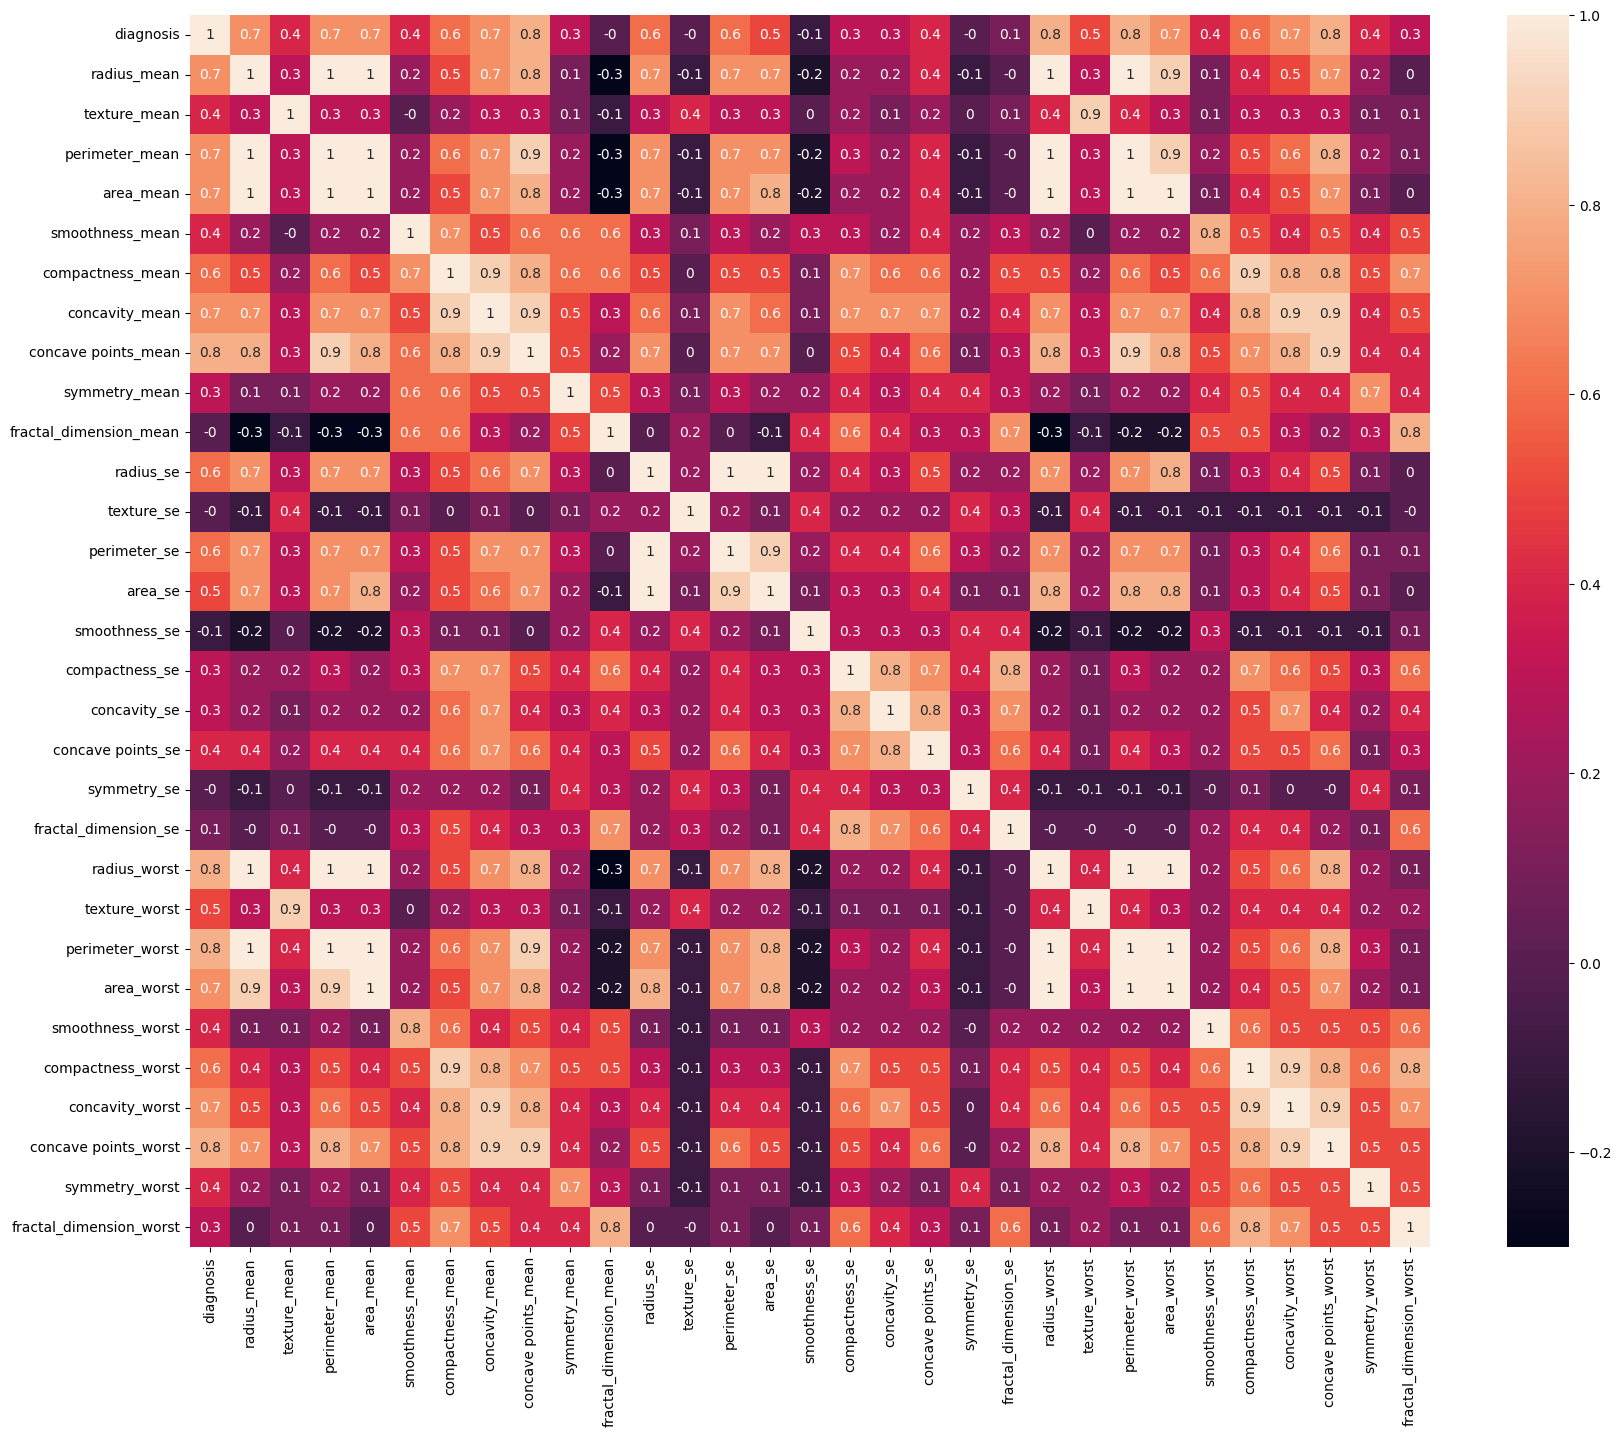

In [ ]:
plt.figure(figsize=(20,16))
plot = sns.heatmap(df.corr().round(1),annot=True)


برای اینکه عملکرد مدل بهبود یابد باید داده های با ضریب همبستگی بالا را حذف کنیم .
آنالیز این داده ها از روی خود ماتریس و مقادیر دشوار است پس هیت مپ آن را رسم میکنیم
این داده ها بیانگر ویژگی هایی هستند که رابطه ی خطی قوی با هم دارند بنابراین میتوان با ضریب خطای کمی گفت که
این داده ها اطلاعات نسبتا مشابهی را به ما میدهند بنابراین اگر آن ها را نگه داریم اضافه کاری حساب میشود
و حساب کردن تاثیر مستقل هرکدام از داده ها در تارگت را نیز با مشکل رو به رو میکند.
پس حذف داده های با ضریب همبستگی بالا از اهمیت بالایی برخوردار است.
در هیت مپ این ماتریس، در قطر اصلی همه یک هستند و رنگ خونه ها سفید است چرا که ضریب همبستگی هر داده
با خودش را می سنجد. هرچه این رنگ به سمت روشنی و سفیدی برود یعنی ضریب همبستگی بیشتری داریم و
هرچه تیره تر شود نشانگر ضریب همبستگی کمتر می باشد.
استانه ای مه اینجا در نظر میگیریم 0.8 هست یعنی هر داده ای که ضریب همبستگی آن بیشتر از 0.8 هست را میتوانیم حذف کنیم

In [ ]:
drop_set = ['perimeter_mean','area_mean','radius_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','fractal_dimension_worst','perimeter_se','area_se','fractal_dimension_se','concavity_se','concave points_se','texture_worst','concave points_mean','compactness_mean','symmetry_worst']
df.drop(drop_set,axis='columns', inplace=True)
df

,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se
0,1,17.99,10.38,0.11840,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003
1,1,20.57,17.77,0.08474,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389
2,1,19.69,21.25,0.10960,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250
3,1,11.42,20.38,0.14250,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963
4,1,20.29,14.34,0.10030,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756
...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114
565,1,20.13,28.25,0.09780,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898
566,1,16.60,28.08,0.08455,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318
567,1,20.60,29.33,0.11780,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.02324


مجموعه

drop_set

مجموعه ای است که با استفاده از ضریب همبستگی می‌توانیم آن را حذف کنیم و در نهایت تنها ۱۲ فیچر باقی میماند

In [ ]:
df.describe()

,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,0.096360,0.088799,0.181162,0.062798,0.405172,1.216853,0.007041,0.025478,0.020542
std,0.483918,3.524049,4.301036,0.014064,0.079720,0.027414,0.007060,0.277313,0.551648,0.003003,0.017908,0.008266
min,0.000000,6.981000,9.710000,0.052630,0.000000,0.106000,0.049960,0.111500,0.360200,0.001713,0.002252,0.007882
25%,0.000000,11.700000,16.170000,0.086370,0.029560,0.161900,0.057700,0.232400,0.833900,0.005169,0.013080,0.015160
50%,0.000000,13.370000,18.840000,0.095870,0.061540,0.179200,0.061540,0.324200,1.108000,0.006380,0.020450,0.018730
75%,1.000000,15.780000,21.800000,0.105300,0.130700,0.195700,0.066120,0.478900,1.474000,0.008146,0.032450,0.023480
max,1.000000,28.110000,39.280000,0.163400,0.426800,0.304000,0.097440,2.873000,4.885000,0.031130,0.135400,0.078950


با استفاده از

df.describe()

اطلاعات فیچرهای باقی مانده را بدست می آوریم دو فیچر

radius_mean & texture_mean

با توجه به انحراف معیار و گستردگی اسکیل داده‌های این دو فیچر این دو را نرمالایز میکنیم




In [ ]:
columns_set = ['radius_mean','texture_mean']
for column in columns_set:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())


نرمال کردن دو ستون با استفاده از فرمول نرمال کردن

In [ ]:
X = df. loc[:, df.columns != 'diagnosis']
y = df.loc[:, ['diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=None, train_size = .80)
print(len(X_train))

455


نسبت بندی به اموزش و تمرین
با نسبت ۸۰ ۲۰ تقسیم میکنیم

ویژگی های mlp

از سه لایه تشکیل شده است که شامل یک لایه ورودی، لایه پنهان و لایه خروجی میشود.درلایه اول ۱۲ نورون در لایه پنهان ۱۰ نورون و در لایه آخر یک نورون داریم.

از دو تابع فعالسازی

relu , sigmoid

به ترتیب برای (لایه ورودی و پنهان) و لایه خروجی استفاده شده

لایه ها به صورت تماما همبند هستند یعنی تمام نورون های لایه قبل به نورون های لایه فعلی متصل هستند

با استفاده از dense


برای بهینه سازی مدل از روش گرادیان کاهشی استفاده میکنیم و تابع زیان را

 binary_crossentropy

 در نظر می‌گیریم که مناسب دسته بندی تک کلاسه است

 برای جلوگیری از اورفیت کردن مدل از

 validation_split=0.1

 استفاده می کنیم  و درنهایت هم برای پیش بینی چون خروجی مدل باینری نیست به اعداد بیشتر از نیم لیبل یک و کمتر از نیم لیبل صفر را اختصاص میدهیم

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(12,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
opt = keras.optimizers.SGD(learning_rate = 0.01)
model.compile(opt, loss='binary_crossentropy')
model.fit(X_train,y_train , epochs=100,validation_split=0.1  )
y_pred = model.predict(X_test)
p_pred = y_pred.flatten()
y_pred1 = np.where(p_pred > 0.5, 1, 0)
print(confusion_matrix(y_test,y_pred1))




Epoch 1/100
13/13 [==============================] - 1s 18ms/step - loss: 0.6530 - val_loss: 0.6618
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6476 - val_loss: 0.6576
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6423 - val_loss: 0.6530
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6373 - val_loss: 0.6488
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6329 - val_loss: 0.6451
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6290 - val_loss: 0.6418
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6251 - val_loss: 0.6387
Epoch 8/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6214 - val_loss: 0.6361
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6180 - val_loss: 0.6337
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6147 - val_loss: 0.6312
Epoch 11

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(12,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
opt = keras.optimizers.SGD(learning_rate = 0.3)
model.compile(opt, loss='binary_crossentropy')
model.fit(X_train,y_train , epochs=100, validation_split=0.1)
y_pred = model.predict(X_test)
p_pred = y_pred.flatten()
y_pred2 = np.where(p_pred > 0.5, 1, 0)
print(confusion_matrix(y_test,y_pred2))


Epoch 1/100
13/13 [==============================] - 1s 16ms/step - loss: 0.6680 - val_loss: 0.6781
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6182 - val_loss: 0.6240
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5525 - val_loss: 0.5652
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4626 - val_loss: 0.4458
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4265 - val_loss: 0.3811
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4248 - val_loss: 0.3489
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2609 - val_loss: 0.3887
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5362 - val_loss: 0.3295
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2872 - val_loss: 0.6208
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2407 - val_loss: 0.4833
Epoch 11

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(12,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
opt = keras.optimizers.SGD(learning_rate = 0.01)
model.compile(opt, loss='binary_crossentropy')
model.fit(X_train,y_train , epochs=300,  validation_split=0.1)
y_pred = model.predict(X_test)
p_pred = y_pred.flatten()
y_pred3 = np.where(p_pred > 0.5, 1, 0)
print(confusion_matrix(y_test,y_pred3))


Epoch 1/300
13/13 [==============================] - 1s 15ms/step - loss: 0.8329 - val_loss: 0.7776
Epoch 2/300
13/13 [==============================] - 0s 6ms/step - loss: 0.7555 - val_loss: 0.7360
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.7142 - val_loss: 0.7148
Epoch 4/300
13/13 [==============================] - 0s 6ms/step - loss: 0.6893 - val_loss: 0.7043
Epoch 5/300
13/13 [==============================] - 0s 6ms/step - loss: 0.6743 - val_loss: 0.6985
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6651 - val_loss: 0.6955
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6594 - val_loss: 0.6938
Epoch 8/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6552 - val_loss: 0.6928
Epoch 9/300
13/13 [==============================] - 0s 5ms/step - loss: 0.6520 - val_loss: 0.6921
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6493 - val_loss: 0.6913
Epoch 11

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(12,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
opt = keras.optimizers.SGD(learning_rate = 0.3)
model.compile(opt, loss='binary_crossentropy')
model.fit(X_train,y_train , epochs=300,  validation_split=0.1)
y_pred = model.predict(X_test)
p_pred = y_pred.flatten()
y_pred4 = np.where(p_pred > 0.5, 1, 0)
print(confusion_matrix(y_test,y_pred4))

Epoch 1/300
13/13 [==============================] - 1s 22ms/step - loss: 0.6654 - val_loss: 0.6856
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6259 - val_loss: 0.6709
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5570 - val_loss: 0.5672
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4903 - val_loss: 0.4720
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 0.3864 - val_loss: 0.7719
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4331 - val_loss: 0.3884
Epoch 7/300
13/13 [==============================] - 0s 6ms/step - loss: 0.2698 - val_loss: 0.6241
Epoch 8/300
13/13 [==============================] - 0s 4ms/step - loss: 0.3461 - val_loss: 0.3500
Epoch 9/300
13/13 [==============================] - 0s 4ms/step - loss: 0.2747 - val_loss: 0.8372
Epoch 10/300
13/13 [==============================] - 0s 5ms/step - loss: 0.2598 - val_loss: 0.4083
Epoch 11

به دلیل استفاده از

split  
از آنجا که هر سری داده های متفاوتی جدا می شوند

و همینطور گرادیان دیسنت که یک الگوریتم بهینه سازی برای تخمین خطای گرادیان با استفاده از دیتاست ترین است و وزن ها را با پس انتشار اپدیت میکند، به عنوان اپتیمایزر و عوامل دیگر باعث میشود که خروجی برای مدل ها مقادیر ثابتی نباشد   .
بنابراین نمیتوان به طور مشخص گفت کدام مدل در حالت کلی عملکرد بهتری داشته است   بنابراین با بررسی اینکه کدام مدل تعداد دفعات بیشتری عملکرد قابل قبول تری نسبت به بقیه داشته است میتوانیم پارامترهایی که داریم را بررسی کنیم
در  اینجا پس از چندین بار ران کردن و بررسی خروجی های متفاوت میبینیم که مدل سوم که

epochs = 300 learning rate = 0.01

عملکرد بهتری داشته است.
از انجا که گرادیان دیسنت یک الگوریتم ایتریتیو است باید چندین بار شبکه را روی دیتاست امتحان کنیم و وزن ها باید تعداد دفغات بیشتری اپدیت شوند بنابراین از

epochs


برای اینکار استفاده میشود. یعنی تعداد مراحلی که دیتا ست روی شبکه ازمایش شده و وزن ها اپدیت میشوند. در اینجا برابر با 100 و 300 را امتحان کرده ایم. و در کل برای مدل سه و چهار که 300 بوده عملکرد بهتری داشته. در واقع اگر تعداد آن بیشتر باشد بهتر است اما باید به این نکته توجه کرد که تعداد زیاد آن باعث اورفیت شدن میشود.
متاسفانه نمیتوان همیشه یک مقدار دقیق را گفت که بهترین باشد زیرا بستگی به دیتاست ممکن است متفاوت باشد اما در حالت کلی بستگی به این داشته که دیتاست تا چه حد از مقادیر گوناگون تشکیل شده است.
پارامتر دیگری که آن را بررسی میکنیم نرخ یادگیری است. از آنجا که از گرادیان دیسنت استفاده کردیم باید این نرخ را تعیین کنیم.
مقداری که وزن ها در ترین شدن اپدیت میشوند نرخ یادگیری نام دارد.
این نرخ کنترل میکند که مدل چقدر سریع با مساله وفق داده میشود.
بنابراین از مهمترین عوامل تاثیرگذار در عملکرد یک مدل است
برای آنکه بفهمیم بهترین نرخ یادگیری چیست بهتر است که با آزمون و خطا پیش بریم.
بهتر است با مقادیر کمتر شروع کرده و به مرور آنها را زیاد کنیم.
از بهترین مقادیری که میتوان شروع کرد 0.1 یا 0.01 است. ما نیز در اینجا دو تا از مدل ها رو با 0.01 ارزیابی کردیم. در واقع هرچقدر نرخ یادگیری بیشتر باشه مدل سریعتر یاد میگیره و ممکنه در زمان زودتری به یک جواب فوق بهینه برسه که این کار رو با مشکل رو به رو میکنه. اگر نرخ یادگیری کمتر باشه به مدل اجازه میده که یک جواب بهینه تری برای وزن ها پیدا کنه اما این نیاز مدت بیشتری برای اموزش دیدن داره. البته باید در نظر داشت که اگر مقدار بسیار کمی داشته باشد ممکنه باعث شه این فرایند از یک مرحله ای جلوتر نرود و اپدیت به درستی انجام نشود
نتیجه ای که میشه گرفت اینه که  

epochs و نرخ یادگیری

روی یکدیگر اثر میگذارند. از اونجایی که اگر نرخ یادگیری پایین باشه هردفعه تغییرات کمتری روی مدل انجام میشه بنابراین تعداد دفعاتی که شبکه آپدیت میشه و  دیتاست به جلو و عقب برده میشه باید بیشتر باشد تا مدل وقت داشته باشه که وزن ها رو به خوبی اپدیت کنه. در مقابل اون اگر نرخ یادگیری زیاد باشه از اونجایی که مدل سریعتر یاد میگیره برای جلوگیری از اورفیت شدن بهتره که ایپاک رو کمتر کنیم تا در دفعات کمتری جلو و عقب بشه و وزن ها اپدیت شن تا جواب فوق بهینه به دست نیاد
میتوانیم تاثیر این دو پارامتر رو در مدل هامون هم ببینیم. همانطور که گفته شد مدل سوم عملکرد نسبی بهتری داشته  
نرخ یادگیری این مدل از مقدار 0.01  استفاده کرده اما در مقابل تعداد ایپاک را افزایش داده ایم تا بتوان به جواب بهینه رسید.  در مقابل  برای بقیه مدلهایی که  این نسبت عکس را رعایت نکردند یعنی هم نرخ یادگیری پایین بوده و هم ایپاک و یا هردو بالا بوده اند، مدل یا جواب بهینه ای بدست نیاورده یا فوق بهینه شده است.

In [ ]:
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test, y_pred3))
print( precision_score(y_test, y_pred3))
print(recall_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))

[[71  2]
 [ 5 36]]
0.9385964912280702
0.9473684210526315
0.8780487804878049
0.9113924050632912


طبق قسمت قبل مدل سوم را به عنوان بهترین مدل بررسی کردیم. حال از معیار های ارزیابی برای عملکرد این مدل استفاده میکنیم
عملکرد این مدل را با ماتریس آشفتگی می سنجیم.
سطر های این ماتریس نشان دهنده ی مقادیر پیش بینی شده و ستون های ان مقادیر واقعی را نشان میدهند
از آنجا که در این دیتاست دو برچسب خوش خیم و بدخیم را داریم
 تشخیص درست یعنی خوش خیم بوده و درست تشخیص داده شده و یا بدخیم بوده و بدخیم هم پیش بینی شده است.

 معیار accuracy

که نشان دهنده ی پیش بینی های درست به کل پیش بینی ها می باشد به طور کلی این مقدار برای این معیار نشان دهنده ی اینست که مدل نسبتا به خوبی آموزش دیده است اما باید توجه کرد که این معیار اطلاعات جزیی در مورد کارایی مدل به ما نمیدهد.

  معیار صحت

   تمرکز اصلی این معیار، بر روی درستیِ تشخیص‌های «بلی» توسط الگوریتم است. یعنی .
   .
   معیاری است که به ما می‌گوید الگوریتم چند درصدِ «بلی»هایش درست بود
   معیار صحت در یکی از ایتریشن ها برابر 86 درصد به دست آمده یعنی اگر مدل تشخیص داد که سرطان خوش خیم است به احتمال 86 درصد به درستی تشخیص داده است.
   معیار ریکال به دنبال یافتن پوشش بلی در میان داده هاست یعنی اگر داده ای واقعا اشتباه باشد درست تشخیص داده نشده باشد.
   از آنجا که ما میخواهیم خوش خیم بودن یا بدخیم بودن سرطان را مشخص کنیم این معیار بسیار ارزش بالایی برای ما دارد. و هرچه بیشتر باشد مدل بهتری داریم
   در اینجا 77 درصد ارزیابی شده است که نسبتا مقدار خوبی است. هرچند اگر مقدار ریکال نسبت به صحت بیشتر بود مدل بهتری براورد میشد
   معیار f1
   ترکیب معیار صحت و پوشش است.
   هرچه این معیار بیشتر باشد مدل ارزش بهتر و عملکرد بهتری داشته است و در اینجا نیز میبینیم که این معیار حدود 81 درصد بیان شده است.